# 数据导入

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

df = pd.read_csv('customer_data_V3.csv')
df.head()

,ID,age,marital,income,house,business,property,debt,job,credit,relation,class
0,C001,5,5,3,3,1,12,10,7,0,3,1
1,C002,5,5,3,3,2,15,10,7,5,4,1
2,C003,5,5,5,3,2,12,7,7,4,4,1
3,C004,5,5,2,3,1,8,10,4,5,1,0
4,C005,5,5,3,3,1,8,7,7,4,1,0


In [4]:
df.info()#无缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 12 columns):
ID          540 non-null object
age         540 non-null int64
marital     540 non-null int64
income      540 non-null int64
house       540 non-null int64
business    540 non-null int64
property    540 non-null int64
debt        540 non-null int64
job         540 non-null int64
credit      540 non-null int64
relation    540 non-null int64
class       540 non-null int64
dtypes: int64(11), object(1)
memory usage: 50.7+ KB


In [5]:
Y = df['class']
X = df.iloc[:,1:11]#切片，row_slice = rows.iloc[0:2, 1:3]  # 取rows的0-1行，1-2列的元素
X.head()

,age,marital,income,house,business,property,debt,job,credit,relation
0,5,5,3,3,1,12,10,7,0,3
1,5,5,3,3,2,15,10,7,5,4
2,5,5,5,3,2,12,7,7,4,4
3,5,5,2,3,1,8,10,4,5,1
4,5,5,3,3,1,8,7,7,4,1


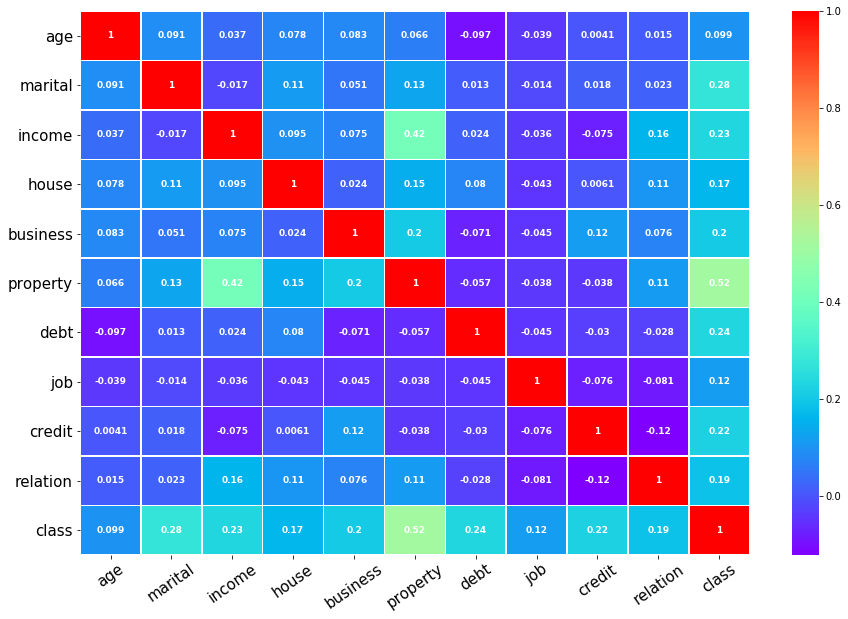

In [6]:
# 变量间的相关系数
import seaborn as sns
corr = df.corr()#计算各变量的相关性系数
xticks = list(corr.index)#x轴标签
yticks = list(corr.index)#y轴标签
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1, 1, 1)
sns.heatmap(corr, annot=True, cmap="rainbow",ax=ax1,linewidths=.5, annot_kws={'size': 9, 'weight': 'bold', 'color': 'white'})
ax1.set_xticklabels(xticks, rotation=35, fontsize=15)
ax1.set_yticklabels(yticks, rotation=0, fontsize=15)
plt.show()


In [7]:
# 各个变量之间相关性小


In [8]:
# 独热编码   --不加特征缩放0.833333  -- 加特征缩放 0.79629  --不加独热编码 0.79629
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features='all')
X = onehotencoder.fit_transform(X).toarray()
X

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
# 划分测试集与训练集 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [10]:
# 特征缩放  -- 不加独热编码 0.80555（--删除--）
# 全都是分类变量 不采用特征缩放

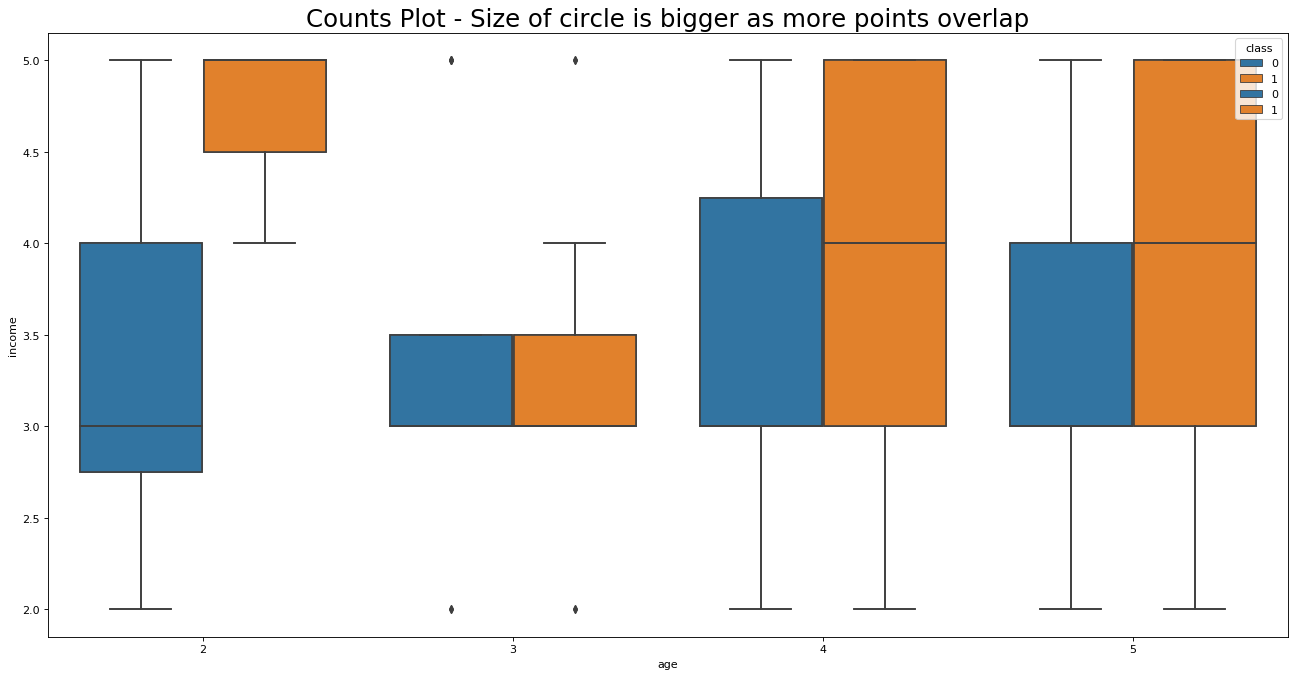

In [11]:
# 可视化探索


df_counts = df.groupby(['class','income']).size().reset_index(name = 'counts')
df_counts.counts
fig, ax = plt.subplots(figsize=(20,10), dpi= 80)    
# sns.stripplot(x="class",y="income",hue="class",size=df_counts.counts,data=df_counts)
sns.boxplot(x="age", y="income", hue="class",data=df)
sns.boxplot(x="age", y="income", hue="class",data=df)
# Decorations
plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=22)
plt.show()

In [12]:
df_counts = df.groupby(['class','income']).size().reset_index(name = 'counts')
df_counts.counts


0     28
1    128
2     43
3     53
4     10
5    111
6     53
7    114
Name: counts, dtype: int64

# 模型建立


In [13]:
# Logistic回归
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
clf=classifier.fit(x_train, y_train)


In [14]:
coe=clf.coef_        #特征权值系数，后面转换为打分规则时会用到
coe

array([[-0.57187877, -0.23712246, -0.28784356,  0.20048013, -0.63047278,
        -0.75974384, -0.70368184,  1.19753381, -0.34733937, -0.33781225,
        -0.28542475,  0.07421171, -0.09204286, -0.68721393, -0.11710787,
        -0.90873979, -0.23637463,  0.24874976, -2.56405314, -1.35023452,
         1.1372684 ,  1.8806546 , -1.55648442, -0.5263107 ,  1.18643045,
        -1.35935903,  0.46299437, -1.13975501, -1.3437549 ,  0.27704882,
         1.31009642, -1.41805489, -0.67796404,  0.70528256, -0.22194887,
         0.71632058]])

In [15]:
# 测试集上预测
y_pred = clf.predict(x_test)

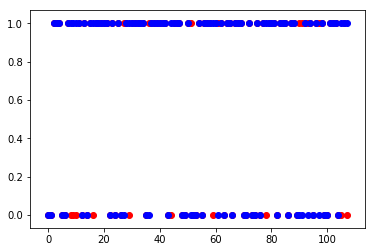

In [17]:
#3预测结果可视化
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(0,108)
plt.scatter(x, y_test, color = 'red')
plt.scatter(x, y_pred, color = 'blue')
plt.show()

In [18]:
# 混淆矩阵
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
p = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0])
p

0.8333333333333334

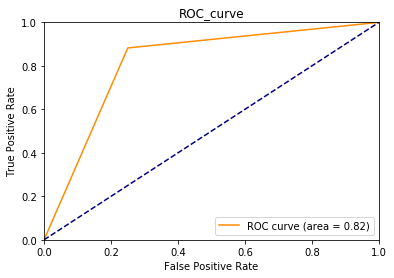

In [19]:
# ROC 曲线
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve')
plt.legend(loc="lower right")
plt.show()

In [20]:
# 神经网络

In [21]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,activation='relu',hidden_layer_sizes=(5,20), random_state=1)
clf.fit(x_train,y_train)

#activation:‘identity’, ‘logistic’, ‘tanh’, ‘relu’


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [22]:
y_nnpred=clf.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_nnpred)
p = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0])
p

0.8425925925925926

In [24]:
y_nnpred.size

108

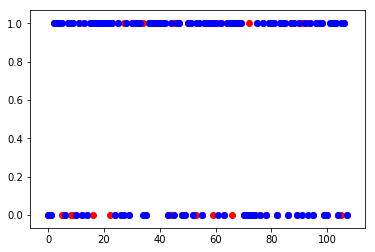

In [25]:
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(0,108)
plt.scatter(x, y_test, color = 'red')
plt.scatter(x, y_nnpred, color = 'blue')
plt.show()
# plt.plot(x,y_test, color=  'red')
# plt.plot(x,y_nnpred, color=  'blue')

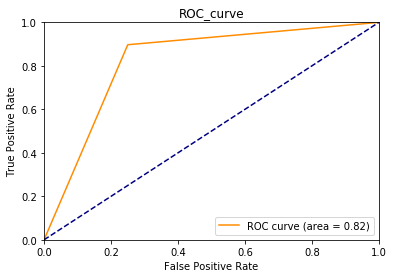

In [26]:
# ROC 曲线
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, y_nnpred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve')
plt.legend(loc="lower right")
plt.show()

In [27]:
# 随机森林
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)
model = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)
model.fit(x_train,y_train)

F:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=101, verbose=0, warm_start=False)

In [28]:
from sklearn.metrics import accuracy_score
y_rfpred = model.predict(x_test)
accuracy_score(y_test,y_rfpred)

0.8209876543209876

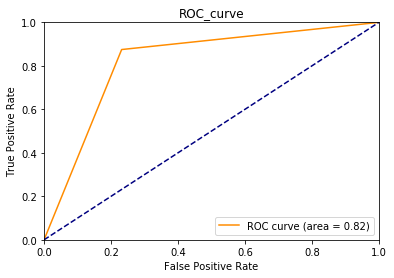

In [29]:
# ROC 曲线
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, y_rfpred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve')
plt.legend(loc="lower right")
plt.show()

In [30]:
# AHP 层次分析法

In [31]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import numpy as np


RI_dict = {1: 0, 2: 0, 3: 0.58, 4: 0.90, 5: 1.12, 6: 1.24, 7: 1.32, 8: 1.41, 9: 1.45,10:0.49,11:0.52}

# 矩阵
A_arr = [[1.0 ,0.5 ,0.2 ,0.3 ,0.5 ,0.2 ,0.3 ,0.2 ,0.2 ,0.3 ,0.5 ],
[2.0 ,1.0 ,0.4 ,0.5 ,1.0 ,0.3 ,0.5 ,0.4 ,0.4 ,0.7 ,1.0], 
[5.0 ,2.5 ,1.0 ,1.3 ,2.5 ,0.8 ,1.3 ,1.0 ,1.0 ,1.7 ,2.5], 
[4.0 ,2.0 ,0.8 ,1.0 ,2.0 ,0.7 ,1.0,0.8 ,0.8 ,1.3 ,2.0 ],
[2.0 ,1.0 ,0.4 ,0.5 ,1.0 ,0.3 ,0.5 ,0.4 ,0.4 ,0.7 ,1.0 ],
[6.0 ,3.0 ,1.2 ,1.5 ,3.0 ,1.0 ,1.5 ,1.2 ,1.2 ,2.0 ,3.0 ],
[4.0 ,2.0 ,0.8 ,1.0 ,2.0 ,0.7 ,1.0 ,0.8 ,0.8 ,1.3 ,2.0 ],
[5.0 ,2.5 ,1.0 ,1.3 ,2.5 ,0.8 ,1.3 ,1.0 ,1.0 ,1.7 ,2.5 ],
[5.0 ,2.5 ,1.0 ,1.3 ,2.5 ,0.8 ,1.3 ,1.0 ,1.0 ,1.7 ,2.5 ],
[3.0 ,1.5 ,0.6 ,0.8 ,1.5 ,0.5 ,0.8 ,0.6 ,0.6 ,1.0 ,1.5 ],
[2.0 ,1.0 ,0.4 ,0.5 ,1.0 ,0.3 ,0.5 ,0.4 ,0.4 ,0.7 ,1.0 ]
]

def main():
    # 矩阵
    A = np.array(A_arr)

    a_sum0 = A.sum(axis=0)
    B = A / a_sum0  
    print('新矩阵:')
    print(B)
    b_sum = B.sum(axis=1)
    print('新矩阵行和: %s' % b_sum)

    
    W = b_sum.sum()
    w_arr = []
    for w in b_sum:
        w_arr.append(w/W)

    print('W: %s' % w_arr)

    AW = []
    for a in A :
        aa = a * w_arr
        AW.append(aa.sum())

    print('AW: %s' % AW)

    result = np.array(AW) / np.array(w_arr)
    print('AW/W: %s' % result)

    row = result.shape[0]
    Max = result.sum()/row
    print('λMax: %s' % Max)

    CI = (Max - row) / (row - 1)
    print('CI: %s' % CI)
    
    CR = CI / RI_dict[row]
    print('CR: %s' % CR)
    
    print(CI/CR)
 
if __name__ == '__main__':
    main()

新矩阵:
[[0.02564103 0.02564103 0.02564103 0.03       0.02564103 0.03125
  0.03       0.02564103 0.02564103 0.02290076 0.02564103]
 [0.05128205 0.05128205 0.05128205 0.05       0.05128205 0.046875
  0.05       0.05128205 0.05128205 0.05343511 0.05128205]
 [0.12820513 0.12820513 0.12820513 0.13       0.12820513 0.125
  0.13       0.12820513 0.12820513 0.12977099 0.12820513]
 [0.1025641  0.1025641  0.1025641  0.1        0.1025641  0.109375
  0.1        0.1025641  0.1025641  0.09923664 0.1025641 ]
 [0.05128205 0.05128205 0.05128205 0.05       0.05128205 0.046875
  0.05       0.05128205 0.05128205 0.05343511 0.05128205]
 [0.15384615 0.15384615 0.15384615 0.15       0.15384615 0.15625
  0.15       0.15384615 0.15384615 0.15267176 0.15384615]
 [0.1025641  0.1025641  0.1025641  0.1        0.1025641  0.109375
  0.1        0.1025641  0.1025641  0.09923664 0.1025641 ]
 [0.12820513 0.12820513 0.12820513 0.13       0.12820513 0.125
  0.13       0.12820513 0.12820513 0.12977099 0.12820513]
 [0.1282051

In [32]:
# 层次聚类分析
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=2)
clf=clustering.fit(x_train,y_train)
clf

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func=<function mean at 0x0000024B41FFC488>)

In [33]:
y_hcpred=clf.fit_predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_hcpred)

0.41975308641975306